In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import os
import regex as re

C:\Users\ngeta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df_train.dropna().shape

(5080, 5)

In [6]:
df_nn = df_train.dropna()
df_nn.shape

(5080, 5)

Lost ~2000 entries to null keyword or location, using text only will result in more data

In [7]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
#Make vocabulary
vocab = set(' '.join(df_test['text'].array.to_numpy()).split()).union(set(' '.join(df_train['text'].array.to_numpy()).split()))
len(vocab)

41747

In [9]:
X = df_train['text'].array.to_numpy()
type(X), len(X), X[:10]

(numpy.ndarray,
 7613,
 array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        'Forest fire near La Ronge Sask. Canada',
        "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
        '13,000 people receive #wildfires evacuation orders in California ',
        'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
        '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
        '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
        "I'm on top of the hill and I can see a fire in the woods...",
        "There's an emergency evacuation happening now in the building across the street",
        "I'm afraid that the tornado is coming to our area..."],
       dtype=object))

In [10]:
Y = df_train['target'].array.to_numpy()
Y.shape

(7613,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=47)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5709,), (1904,), (5709,), (1904,))

In [12]:
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english')).union(set(string.punctuation))

In [13]:
# Pipeline with linear model
classifier_linear = Pipeline([
    ('vect', CountVectorizer(vocabulary=vocab, stop_words=stop)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='log',random_state=47)),
])

In [14]:
classifier_linear.fit(X_train,y_train)

C:\Users\ngeta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
C:\Users\ngeta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'just', 'm...dom_state=47, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [15]:
#Test
test_text_data = df_test['text'].array.to_numpy()
predicted = classifier_linear.predict(X_test)

In [16]:
np.mean(predicted == y_test)

0.8025210084033614

# Decent accuracy, now to clean the data and look at the doc-term matrix:

In [17]:
# Number of links
len({x for x in vocab if 'http' in x})

6562

In [18]:
# Number of stopwords in vocab
len({x for x in vocab if x in stop}), len(stop)

(172, 211)

In [19]:
X[:10], X[100:110], X[-10:]

(array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        'Forest fire near La Ronge Sask. Canada',
        "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
        '13,000 people receive #wildfires evacuation orders in California ',
        'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
        '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
        '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
        "I'm on top of the hill and I can see a fire in the woods...",
        "There's an emergency evacuation happening now in the building across the street",
        "I'm afraid that the tornado is coming to our area..."],
       dtype=object),
 array(['.@NorwayMFA #Bahrain police had previously died in a road ac

In [20]:
#How many non alpha numeric words in vocab?
len([x for x in vocab if (not bool(re.match(r'^[a-zA-Z-]+[0-9]*$',x))) or x.startswith('http')]), len(vocab)

(23121, 41747)

In [21]:
# Remove nonalphanumeric words and links
removed = {x for x in vocab if (not bool(re.match(r'^[a-zA-Z-]+[0-9]*$',x))) or x.startswith('http')}
filtered = vocab - removed
len(filtered)

18626

In [22]:
# Looking at part of the new vocab
f = list(filtered)
print(f[:40]) 
print(f[-40:])

['Hardwell', 'DAMN', 'Nuclear-Powered', 'gives', 'hazard', 'raining', 'Elm', 'learned', 'kitana', 'congratulations', 'DD', 'REPAIR', 'systematic', 'Salvation', 'colomr', 'distinct', 'pandemic', 'Weapon', 'research', 'Allies', 'rainstorms', 'Volunteers', 'parked', 'army', 'dry', 'Goo', 'MOTHER', 'Sometimes', 'rezaphotography', 'fucking', 'mortgage', 'Abortion', 'Afghanistan', 'Ankle', 'endorsements', 'wins', 'OMEGA', 'grenades', 'helicopters', 'prophet']
['Holmdel', 'Stupid', 'bak', 'investigate', 'simply', 'ears', 'stomach', 'Exploded', 'WITHOUT', 'BICENTENNIAL', 'Mile', 'interval', 'VAN', 'faster', 'answers', 'Rhinestone', 'AAAA', 'WEATHER', 'IDK', 'Rosenthal-author', 'SMOOCHY', 'Theft', 'half-hr', 'sevenfigz', 'Blocks', 'conclusions', 'Worldpay', 'chat', 'DVDs', 'probs', 'venture', 'dem', 'seawalls', 'Hank', 'National', 'trampling', 'Hillary', 'hour', 'forms', 'Anyone']


In [23]:
#Still has punctuation:
filtered = {f.strip(string.punctuation) for f in filtered}
f = list(filtered)
print(f[:40]) 
print(f[-40:])

['Hardwell', 'DAMN', 'Nuclear-Powered', 'gives', 'hazard', 'raining', '', 'Elm', 'learned', 'kitana', 'congratulations', 'DD', 'REPAIR', 'systematic', 'Salvation', 'colomr', 'distinct', 'pandemic', 'Weapon', 'research', 'Allies', 'rainstorms', 'Volunteers', 'parked', 'army', 'dry', 'Goo', 'MOTHER', 'Sometimes', 'rezaphotography', 'fucking', 'mortgage', 'Abortion', 'Afghanistan', 'Ankle', 'endorsements', 'wins', 'OMEGA', 'grenades', 'helicopters']
['Holmdel', 'Stupid', 'bak', 'investigate', 'simply', 'ears', 'stomach', 'Exploded', 'WITHOUT', 'BICENTENNIAL', 'Mile', 'interval', 'VAN', 'faster', 'answers', 'Rhinestone', 'AAAA', 'WEATHER', 'IDK', 'Rosenthal-author', 'SMOOCHY', 'Theft', 'half-hr', 'sevenfigz', 'Blocks', 'conclusions', 'Worldpay', 'chat', 'DVDs', 'probs', 'venture', 'dem', 'seawalls', 'Hank', 'National', 'trampling', 'Hillary', 'JAG', 'forms', 'racing']


In [24]:
#Make doc-term matrix
cv = CountVectorizer(vocabulary=filtered, stop_words=stop)
dc = cv.fit_transform(X)
dc.shape

(7613, 18557)

In [25]:
#Index corresponds to index in df_nn(training data)
df_dtm = pd.DataFrame(dc.toarray(), columns=cv.get_feature_names())
#df_dtm = df_dtm.drop(labels=[''],axis = 1)
df_dtm.head(12)

,,10,A,A-Bomb,A-bomb,A-bombed,A-bombs,A1,A2,A27,...,zionist,zipped,zix,zombie,zombies,zone,zones,zoom,zumiez,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis ###

In [26]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from collections import Counter

In [27]:
def generate_wordcloud(data):
    title = 'Disaster'
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
# Get text with disaster, flatten all the words, get a dictionary of the frequencies
df_disaster = df_train[df_train['target'] == 1]
words = [w for w in ' '.join(df_disaster['text'].to_numpy()).split() if (w.lower() in cv.vocabulary_ and w.lower() not in stop)]
counts = dict(Counter(words))
len(words)

20565

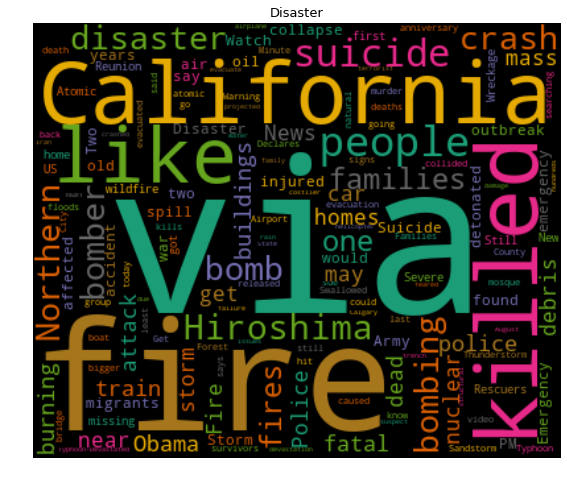

In [28]:
#Word cloud of tweets tagged as indicating natural disaster 
generate_wordcloud(counts)

Seems like there are a lot of words you'd expect to see, like fire, dead, crash, and of course, disaster. But it would be useful to look at what words are *unique* to disaster tweets:

In [29]:
# Get words that are in non disaster tweets
df_non = df_train[df_train['target'] == 1]
non_disaster = [w for w in ' '.join(df_non['text'].to_numpy()).split() if w.lower() in cv.vocabulary_]
unique_disaster = {a:counts[a] for a in counts.keys() if a not in (non_disaster)}
len(unique_disaster)

0

## None! This is why ML will be needed to pickup on the differences ##

In [37]:
df_disaster[df_disaster['text'].str.contains('via')].text

137     Strict liability in the context of an airplane...
142     Man Goes into Airplane Engine Accident: http:/...
156     Pilot Dies In Plane Crash At Car Festival http...
218     Cop pulls drunk driver to safety SECONDS befor...
220     Cop pulls drunk driver to safety SECONDS befor...
238     Cop pulls drunk driver to safety SECONDS befor...
249     :StarMade: :Stardate 3: :Planetary Annihilatio...
251     U.S National Park Services Tonto National Fore...
253     U.S National Park Services Tonto National Fore...
264     Stop the Annihilation of the Salt River Wild H...
271     U.S National Park Services Tonto National Fore...
294     There's a Storm over Cairo in the latest 'X-Me...
399     Jewish leaders prayed at the hospital where a ...
408     Arson suspect linked to 30 fires caught in Nor...
490     Christian Attacked by Muslims at the Temple Mo...
491     Christian Attacked by Muslims at the Temple Mo...
492     Christian Attacked by Muslims at the Temple Mo...
495     Christ